ОБРАБОТКА ТРЕНИРОВОЧНОГО ДАТАСЕТА (ИМПОРТ БИБЛИОТЕК И СОЗДАНИЕ НОВЫХ ФИЧ)

In [124]:
import pandas as pd
import numpy as np

In [125]:
train_data = pd.read_csv ('train.csv')

In [126]:
test_data = pd.read_csv ('test.csv')

In [127]:
train = pd.DataFrame (train_data)
test = pd.DataFrame (test_data)

In [128]:
train.head (6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [129]:
train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    print(big_string)
    return np.nan

title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle', 'Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

train['Title'] = train['Name'].map(lambda x: substrings_in_string(x, title_list))

def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if x['Sex'] == 'Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

train['Title'] = train.apply(replace_titles, axis=1)

In [131]:
def substrings_in_string(big_string, substrings):
    if pd.isna(big_string):
        return 'Unknown'
    for substring in substrings:
        if substring in big_string:
            return substring
    return 'Unknown'

cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G']

train['Deck'] = train['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [132]:
train['Family_Size']=train['SibSp']+train['Parch']+1

def categorize_family_size(size):
    if size == 1:
        return "Solo"
    elif size <= 4:
        return "Small"
    else:
        return "Large"

train["FamilyGroup"] = train["Family_Size"].apply(categorize_family_size).astype('category')

train["FamilyGroup"].unique()

['Small', 'Solo', 'Large']
Categories (3, object): ['Large', 'Small', 'Solo']

In [133]:
def numeric_family_size_category(size):
    if size == 1:
        return 0
    elif size <= 4:
        return 1
    else:
        return 2

train["NumericFamilySize"] = train["Family_Size"].apply(numeric_family_size_category).astype('int')

train["NumericFamilySize"].unique()

array([1, 0, 2])

In [134]:
train["TicketPrefix"] = train["Ticket"].apply(lambda x: x.split(" ")[0] if not x.isdigit() else "None")

def classify_status(row):
    if row["Fare"] == 0 or row["TicketPrefix"] in ["LINE", "W.E.P.", "A/5", "A/4"]:
        return "Employee"
    elif row["Pclass"] == 1 and row["Fare"] > 100:
        return "Wealthy"
    elif row["Pclass"] == 2 or (row["Pclass"] == 1 and row["Fare"] <= 100):
        return "Middle"
    else:
        return "Low"

train["PassengerStatus"] = train.apply(classify_status, axis=1).astype('category')

train["PassengerStatus"].unique()

['Employee', 'Middle', 'Low', 'Wealthy']
Categories (4, object): ['Employee', 'Low', 'Middle', 'Wealthy']

In [135]:
def detailed_classify_status(row):
    ticket_prefix = row["TicketPrefix"]
    fare = row["Fare"]
    pclass = row["Pclass"]

    if ticket_prefix in ["STON/O", "A/5", "A/4", "SOTON/O.Q.", "SOTON/OQ", "SC/AH", "C.A./SOTON", "A.5."] or fare < 10:
        return "Migrant"

    if fare == 0 or ticket_prefix in ["LINE", "W.E.P.", "SW/PP", "S.C./A.4.", "P/PP"]:
        return "Crew"

    if pclass == 1 and fare > 100:
        return "Wealthy Passenger"

    if pclass == 2 or (pclass == 1 and fare <= 100):
        return "Middle-Class Passenger"

    return "Low-Class Passenger"

train["DetailedPassengerStatus"] = train.apply(detailed_classify_status, axis=1).astype('category')

train["DetailedPassengerStatus"].unique()

['Migrant', 'Middle-Class Passenger', 'Low-Class Passenger', 'Wealthy Passenger', 'Crew']
Categories (5, object): ['Crew', 'Low-Class Passenger', 'Middle-Class Passenger', 'Migrant', 'Wealthy Passenger']

In [136]:
train["GroupSize"] = train.groupby("Ticket")["Ticket"].transform("count").astype('int')

train["GroupSize"].unique()

array([1, 2, 4, 3, 7, 5, 6])

In [137]:
def categorize_age(age):
    if pd.isna(age):
        return "Unknown"
    elif age <= 12:
        return "Child"
    elif age <= 19:
        return "Teen"
    elif age <= 59:
        return "Adult"
    else:
        return "Senior"

train["AgeGroup"] = train["Age"].apply(categorize_age).astype('category')


train["AgeGroup"].unique()

['Adult', 'Unknown', 'Child', 'Teen', 'Senior']
Categories (5, object): ['Adult', 'Child', 'Senior', 'Teen', 'Unknown']

In [138]:
def encode_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title in ['Mme']:
        return 'Mrs'
    elif title in ['Dr', 'Major', 'Col', 'Capt', 'Rev']:
        return 'Officer'
    elif title in ['Don', 'Sir', 'the Countess', 'Lady', 'Jonkheer']:
        return 'Noble'
    else:
        return 'Other'

train["TitleEncoded"] = train["Title"].apply(encode_title).astype('category')

train["TitleEncoded"].unique()

['Mr', 'Mrs', 'Miss', 'Master']
Categories (4, object): ['Master', 'Miss', 'Mr', 'Mrs']

In [139]:
train["IsAlone"] = train["Family_Size"].apply(lambda x: 1 if x == 1 else 0).astype('category')

train["IsAlone"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [140]:
def extract_family_name(Name):
    family_name = Name.split(",")[0].strip()
    return family_name

train["FamilyName"] = train["Name"].apply(extract_family_name).astype('category')

print(train["FamilyName"].unique())

['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', ..., 'Banfield', 'Sutehall', 'Montvila', 'Behr', 'Dooley']
Length: 667
Categories (667, object): ['Abbing', 'Abbott', 'Abelson', 'Adahl', ..., 'de Pelsmaeker', 'del Carlo', 'van Billiard', 'van Melkebeke']


In [141]:
port_mapping = {"C": "Cherbourg", "S": "Southampton", "Q": "Queenstown"}
train["EmbarkedCategory"] = train["Embarked"].map(port_mapping).astype('category')

train["EmbarkedCategory"].unique()

['Southampton', 'Cherbourg', 'Queenstown', NaN]
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

In [142]:
train["Pclass_Fare"] = train["Pclass"].astype(float) * train["Fare"].astype(float)
train["Title_AgeGroup"] = train["TitleEncoded"].astype(str) + "_" + train["AgeGroup"].astype(str)
train['Title_AgeGroup'] = train['Title_AgeGroup'].astype('category')

print(train["Title_AgeGroup"].unique())
print(train["Pclass_Fare"].head())

['Mr_Adult', 'Mrs_Adult', 'Miss_Adult', 'Mr_Unknown', 'Master_Child', ..., 'Mr_Senior', 'Master_Unknown', 'Miss_Senior', 'Mrs_Senior', 'Mr_Child']
Length: 16
Categories (16, object): ['Master_Child', 'Master_Unknown', 'Miss_Adult', 'Miss_Child', ..., 'Mrs_Adult', 'Mrs_Senior', 'Mrs_Teen', 'Mrs_Unknown']
0    21.7500
1    71.2833
2    23.7750
3    53.1000
4    24.1500
Name: Pclass_Fare, dtype: float64


In [143]:
train['Age*Class']=train['Age']*train['Pclass']

In [144]:
train['Fare_Per_Person']=train['Fare']/(train['GroupSize'])

In [145]:
train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   PassengerId              891 non-null    int64   
 1   Survived                 891 non-null    int64   
 2   Pclass                   891 non-null    int64   
 3   Name                     891 non-null    object  
 4   Sex                      891 non-null    object  
 5   Age                      714 non-null    float64 
 6   SibSp                    891 non-null    int64   
 7   Parch                    891 non-null    int64   
 8   Ticket                   891 non-null    object  
 9   Fare                     891 non-null    float64 
 10  Cabin                    204 non-null    object  
 11  Embarked                 889 non-null    object  
 12  Title                    891 non-null    object  
 13  Deck                     891 non-null    object  
 14  Family_Siz

In [146]:
train.head (5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,GroupSize,AgeGroup,TitleEncoded,IsAlone,FamilyName,EmbarkedCategory,Pclass_Fare,Title_AgeGroup,Age*Class,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,Adult,Mr,0,Braund,Southampton,21.7500,Mr_Adult,66.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,Adult,Mrs,0,Cumings,Cherbourg,71.2833,Mrs_Adult,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Adult,Miss,1,Heikkinen,Southampton,23.7750,Miss_Adult,78.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,Adult,Mrs,0,Futrelle,Southampton,53.1000,Mrs_Adult,35.0,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,Adult,Mr,1,Allen,Southampton,24.1500,Mr_Adult,105.0,8.0500


In [147]:
train.to_csv ('new_train.csv', index=False)

___________________________________
ОБРАБОТКА ТЕСТОВОГО ДАТАСЕТА (СОЗДАНИЕ НОВЫХ ФИЧ ПО АНАЛОГИИ С ТРЕНИРОВОЧНЫМ ДАТАСЕТОМ)

In [148]:
test.head (6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [149]:
test.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [150]:
test['Title'] = test['Name'].map(lambda x: substrings_in_string(x, title_list))

def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if x['Sex'] == 'Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

test['Title'] = test.apply(replace_titles, axis=1)

In [151]:
test['Deck'] = test['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [152]:
test['Family_Size']=test['SibSp']+test['Parch']+1

def categorize_family_size(size):
    if size == 1:
        return "Solo"
    elif size <= 4:
        return "Small"
    else:
        return "Large"

test["FamilyGroup"] = test["Family_Size"].apply(categorize_family_size).astype('category')

test["FamilyGroup"].unique()

['Solo', 'Small', 'Large']
Categories (3, object): ['Large', 'Small', 'Solo']

In [153]:
def numeric_family_size_category(size):
    if size == 1:
        return 0
    elif size <= 4:
        return 1
    else:
        return 2

test["NumericFamilySize"] = test["Family_Size"].apply(numeric_family_size_category).astype('int')

test["NumericFamilySize"].unique()

array([0, 1, 2])

In [154]:
test["TicketPrefix"] = test["Ticket"].apply(lambda x: x.split(" ")[0] if not x.isdigit() else "None")

def classify_status(row):
    if row["Fare"] == 0 or row["TicketPrefix"] in ["LINE", "W.E.P.", "A/5", "A/4"]:
        return "Employee"
    elif row["Pclass"] == 1 and row["Fare"] > 100:
        return "Wealthy"
    elif row["Pclass"] == 2 or (row["Pclass"] == 1 and row["Fare"] <= 100):
        return "Middle"
    else:
        return "Low"

test["PassengerStatus"] = test.apply(classify_status, axis=1).astype('category')

test["PassengerStatus"].unique()

['Low', 'Middle', 'Employee', 'Wealthy']
Categories (4, object): ['Employee', 'Low', 'Middle', 'Wealthy']

In [155]:
def detailed_classify_status(row):
    ticket_prefix = row["TicketPrefix"]
    fare = row["Fare"]
    pclass = row["Pclass"]

    if ticket_prefix in ["STON/O", "A/5", "A/4", "SOTON/O.Q.", "SOTON/OQ", "SC/AH", "C.A./SOTON", "A.5."] or fare < 10:
        return "Migrant"

    if fare == 0 or ticket_prefix in ["LINE", "W.E.P.", "SW/PP", "S.C./A.4.", "P/PP"]:
        return "Crew"

    if pclass == 1 and fare > 100:
        return "Wealthy Passenger"

    if pclass == 2 or (pclass == 1 and fare <= 100):
        return "Middle-Class Passenger"

    return "Low-Class Passenger"

test["DetailedPassengerStatus"] = test.apply(detailed_classify_status, axis=1).astype('category')

test["DetailedPassengerStatus"].unique()

['Migrant', 'Low-Class Passenger', 'Middle-Class Passenger', 'Crew', 'Wealthy Passenger']
Categories (5, object): ['Crew', 'Low-Class Passenger', 'Middle-Class Passenger', 'Migrant', 'Wealthy Passenger']

In [156]:
test["GroupSize"] = test.groupby("Ticket")["Ticket"].transform("count").astype('int')

test["GroupSize"].unique()

array([1, 2, 5, 3, 4])

In [157]:
def categorize_age(age):
    if pd.isna(age):
        return "Unknown"
    elif age <= 12:
        return "Child"
    elif age <= 19:
        return "Teen"
    elif age <= 59:
        return "Adult"
    else:
        return "Senior"

test["AgeGroup"] = test["Age"].apply(categorize_age).astype('category')

test["AgeGroup"].unique()

['Adult', 'Senior', 'Teen', 'Unknown', 'Child']
Categories (5, object): ['Adult', 'Child', 'Senior', 'Teen', 'Unknown']

In [158]:
def encode_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title in ['Mme']:
        return 'Mrs'
    elif title in ['Dr', 'Major', 'Col', 'Capt', 'Rev']:
        return 'Officer'
    elif title in ['Don', 'Sir', 'the Countess', 'Lady', 'Jonkheer']:
        return 'Noble'
    else:
        return 'Other'

test["TitleEncoded"] = test["Title"].apply(encode_title).astype('category')

test["TitleEncoded"].unique()

['Mr', 'Mrs', 'Miss', 'Master']
Categories (4, object): ['Master', 'Miss', 'Mr', 'Mrs']

In [159]:
test["IsAlone"] = test["Family_Size"].apply(lambda x: 1 if x == 1 else 0).astype('category')

test["IsAlone"].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [160]:
def extract_family_name(Name):
    family_name = Name.split(",")[0].strip()
    return family_name

test["FamilyName"] = test["Name"].apply(extract_family_name).astype('category')

print(test["FamilyName"].unique())

['Kelly', 'Wilkes', 'Myles', 'Wirz', 'Hirvonen', ..., 'Henriksson', 'Spector', 'Oliva y Ocana', 'Saether', 'Peter']
Length: 352
Categories (352, object): ['Abbott', 'Abelseth', 'Abrahamsson', 'Abrahim', ..., 'de Brito', 'de Messemaeker', 'del Carlo', 'van Billiard']


In [161]:
port_mapping = {"C": "Cherbourg", "S": "Southampton", "Q": "Queenstown"}
test["EmbarkedCategory"] = test["Embarked"].map(port_mapping).astype('category')

test["EmbarkedCategory"].unique()

['Queenstown', 'Southampton', 'Cherbourg']
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

In [162]:
test["Pclass_Fare"] = test["Pclass"].astype(float) * test["Fare"].astype(float)
test["Title_AgeGroup"] = test["TitleEncoded"].astype(str) + "_" + test["AgeGroup"].astype(str)
test['Title_AgeGroup'] = test['Title_AgeGroup'].astype('category')

print(test["Title_AgeGroup"].unique())
print(test["Pclass_Fare"].head())

['Mr_Adult', 'Mrs_Adult', 'Mr_Senior', 'Mr_Teen', 'Miss_Adult', ..., 'Mrs_Senior', 'Master_Teen', 'Miss_Teen', 'Miss_Child', 'Master_Unknown']
Length: 15
Categories (15, object): ['Master_Child', 'Master_Teen', 'Master_Unknown', 'Miss_Adult', ..., 'Mrs_Adult', 'Mrs_Senior', 'Mrs_Teen', 'Mrs_Unknown']
0    23.4876
1    21.0000
2    19.3750
3    25.9875
4    36.8625
Name: Pclass_Fare, dtype: float64


In [163]:
test['Age*Class']=test['Age']*test['Pclass']

In [164]:
test['Fare_Per_Person']=test['Fare']/(test['Family_Size']+1)

In [165]:
test.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   PassengerId              418 non-null    int64   
 1   Pclass                   418 non-null    int64   
 2   Name                     418 non-null    object  
 3   Sex                      418 non-null    object  
 4   Age                      332 non-null    float64 
 5   SibSp                    418 non-null    int64   
 6   Parch                    418 non-null    int64   
 7   Ticket                   418 non-null    object  
 8   Fare                     417 non-null    float64 
 9   Cabin                    91 non-null     object  
 10  Embarked                 418 non-null    object  
 11  Title                    418 non-null    object  
 12  Deck                     418 non-null    object  
 13  Family_Size              418 non-null    int64   
 14  FamilyGrou

In [166]:
test.to_csv ('new_test.csv', index=False)

_____________________________
СОЗДАНИЕ МОДЕЛЕЙ И ПРОГНОЗИРОВАНИЕ НА ТЕСТОВОМ ДАТАСЕТЕ

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy import stats

warnings.filterwarnings('ignore', category=UserWarning)

In [168]:
# 1. Загрузка данных
train = pd.read_csv('new_train.csv')
test = pd.read_csv('new_test.csv')

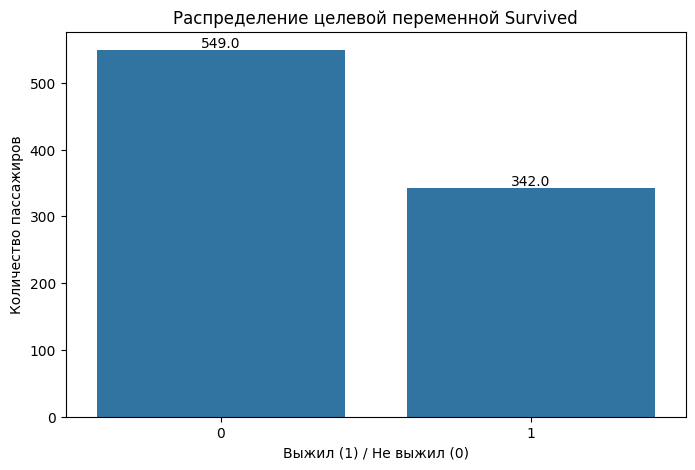

In [169]:
# 2. Распределение целевой переменной Survived
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Survived', data=train)
plt.title('Распределение целевой переменной Survived')
plt.xlabel('Выжил (1) / Не выжил (0)')
plt.ylabel('Количество пассажиров')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.show()

In [170]:
# 3. Предварительный анализ данных
print("\nИнформация о данных:")
print(train.info())
print("\nСтатистика числовых признаков:")
print(train.describe())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              891 non-null    int64  
 1   Survived                 891 non-null    int64  
 2   Pclass                   891 non-null    int64  
 3   Name                     891 non-null    object 
 4   Sex                      891 non-null    object 
 5   Age                      714 non-null    float64
 6   SibSp                    891 non-null    int64  
 7   Parch                    891 non-null    int64  
 8   Ticket                   891 non-null    object 
 9   Fare                     891 non-null    float64
 10  Cabin                    204 non-null    object 
 11  Embarked                 889 non-null    object 
 12  Title                    891 non-null    object 
 13  Deck                     891 non-null    object 
 14  Fami

In [171]:
# 4. Обработка пропущенных значений с добавлением обработки выбросов
def handle_missing_and_outliers(df, numeric_features):
    df = df.copy()
    
    # Заполнение числовых признаков
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        if df[col].isna().any():
            if col == 'Age':
                df[col] = df.groupby(['Sex', 'Pclass'])[col].transform(
                    lambda x: x.fillna(x.median()))
            else:
                df[col].fillna(df[col].median(), inplace=True)
    
    # Обработка выбросов для числовых признаков
    for col in numeric_features:
        if col in df.columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            df[col] = np.where(df[col] < lower_bound, lower_bound, 
                              np.where(df[col] > upper_bound, upper_bound, df[col]))
    
    # Заполнение категориальных и строковых признаков
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        if df[col].isna().any():
            if df[col].dtype.name == 'category':
                if 'Unknown' not in df[col].cat.categories:
                    df[col] = df[col].cat.add_categories(['Unknown'])
                df[col] = df[col].fillna('Unknown')
            else:
                df[col] = df[col].fillna('Unknown')
    
    return df

In [172]:
# 5. Определение финального набора признаков
excluded_features = [
    'PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived', 
    'Embarked', 'TitleEncoded', 'TicketPrefix', 'Deck'
]

def auto_detect_features(df, excluded_features):
    numeric_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
    categorical_features = list(df.select_dtypes(include=['object', 'category', 'bool']).columns)
    
    numeric_features = [f for f in numeric_features if f not in excluded_features]
    categorical_features = [f for f in categorical_features if f not in excluded_features]
    
    available_features = set(df.columns)
    return (
        [f for f in numeric_features if f in available_features],
        [f for f in categorical_features if f in available_features]
    )

numeric_features, categorical_features = auto_detect_features(train, excluded_features)
features = numeric_features + categorical_features

# Применяем улучшенную обработку данных
train = handle_missing_and_outliers(train, numeric_features)
test = handle_missing_and_outliers(test, numeric_features)

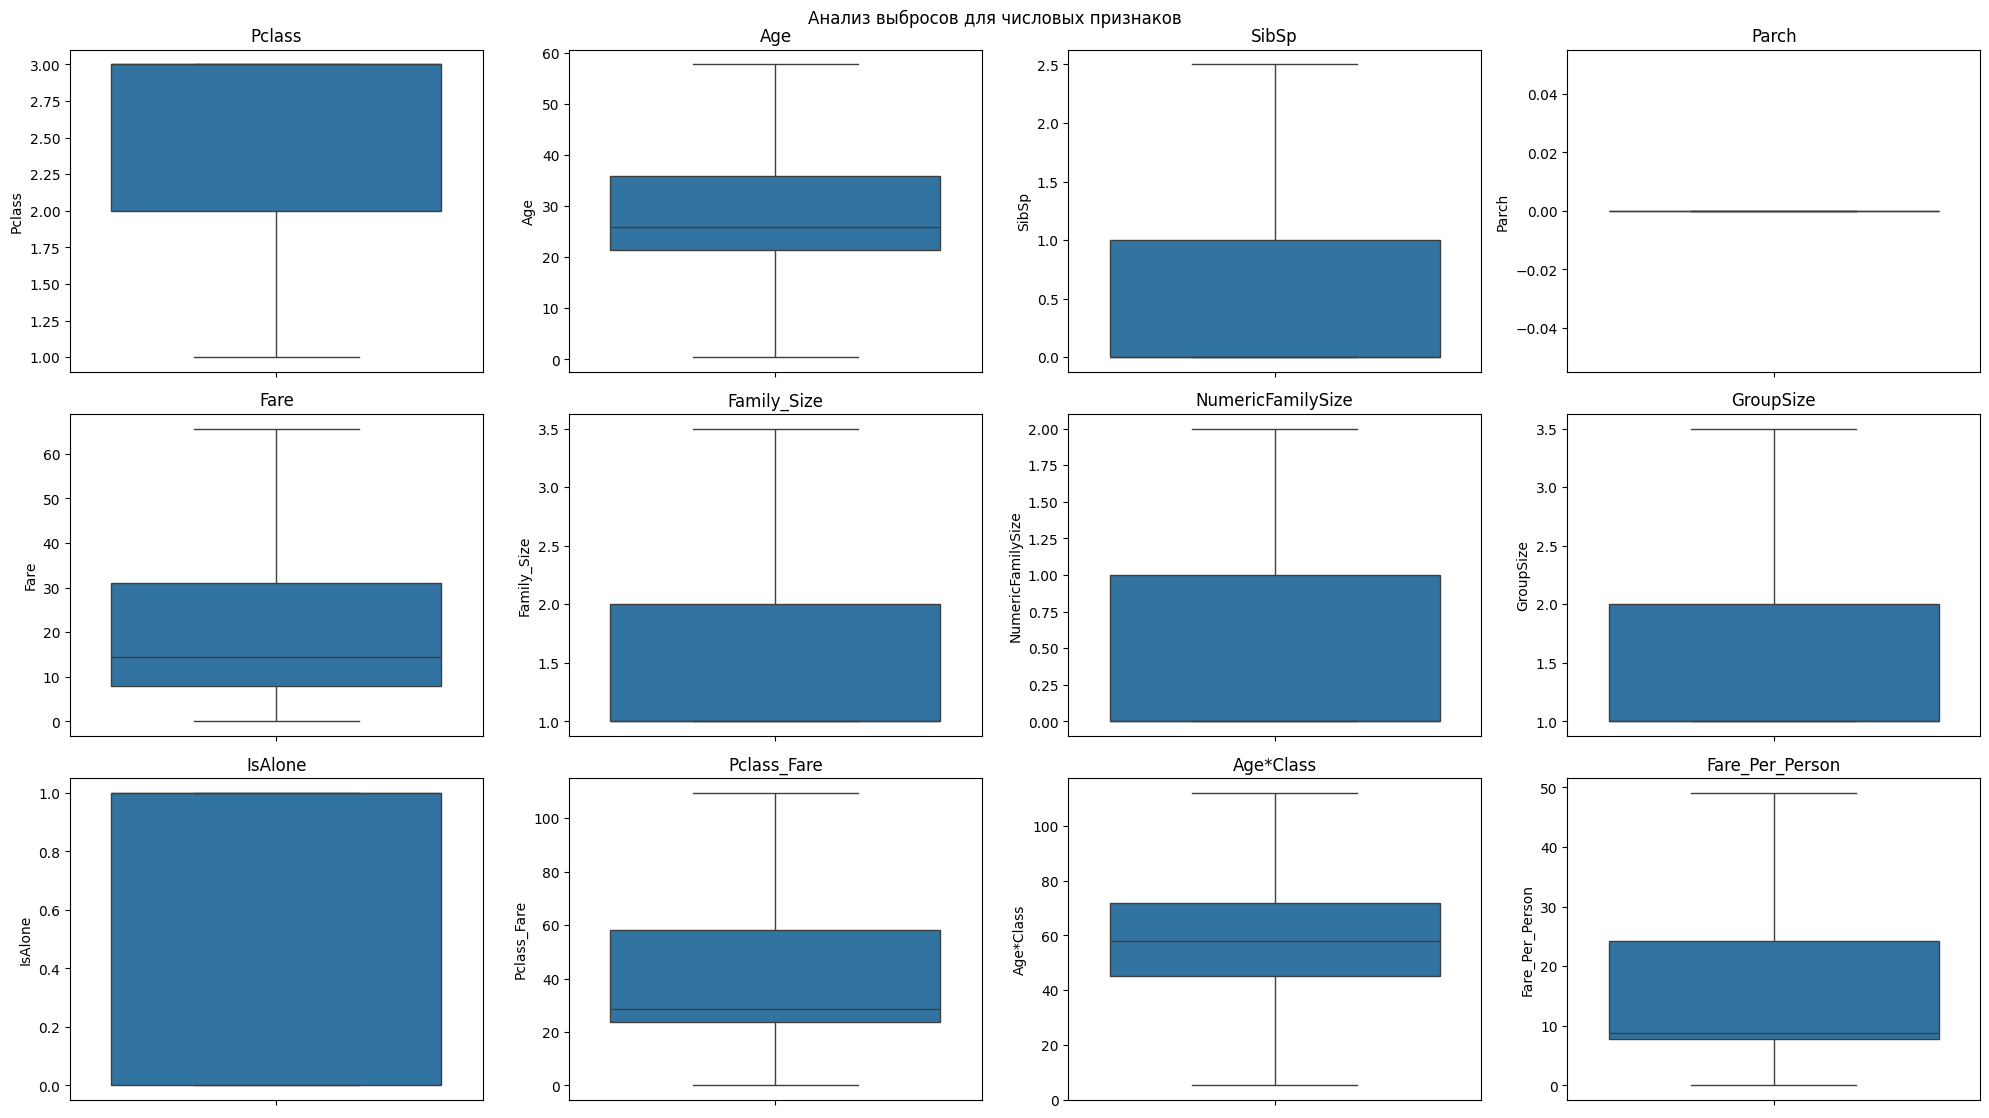

In [173]:
# 6. Визуализация числовых признаков
numeric_in_features = [f for f in features if f in numeric_features]
plt.figure(figsize=(20, 15))
plt.suptitle('Анализ выбросов для числовых признаков')
for i, col in enumerate(numeric_in_features, 1):
    plt.subplot(len(numeric_in_features)//4 + 1, 4, i)
    sns.boxplot(y=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

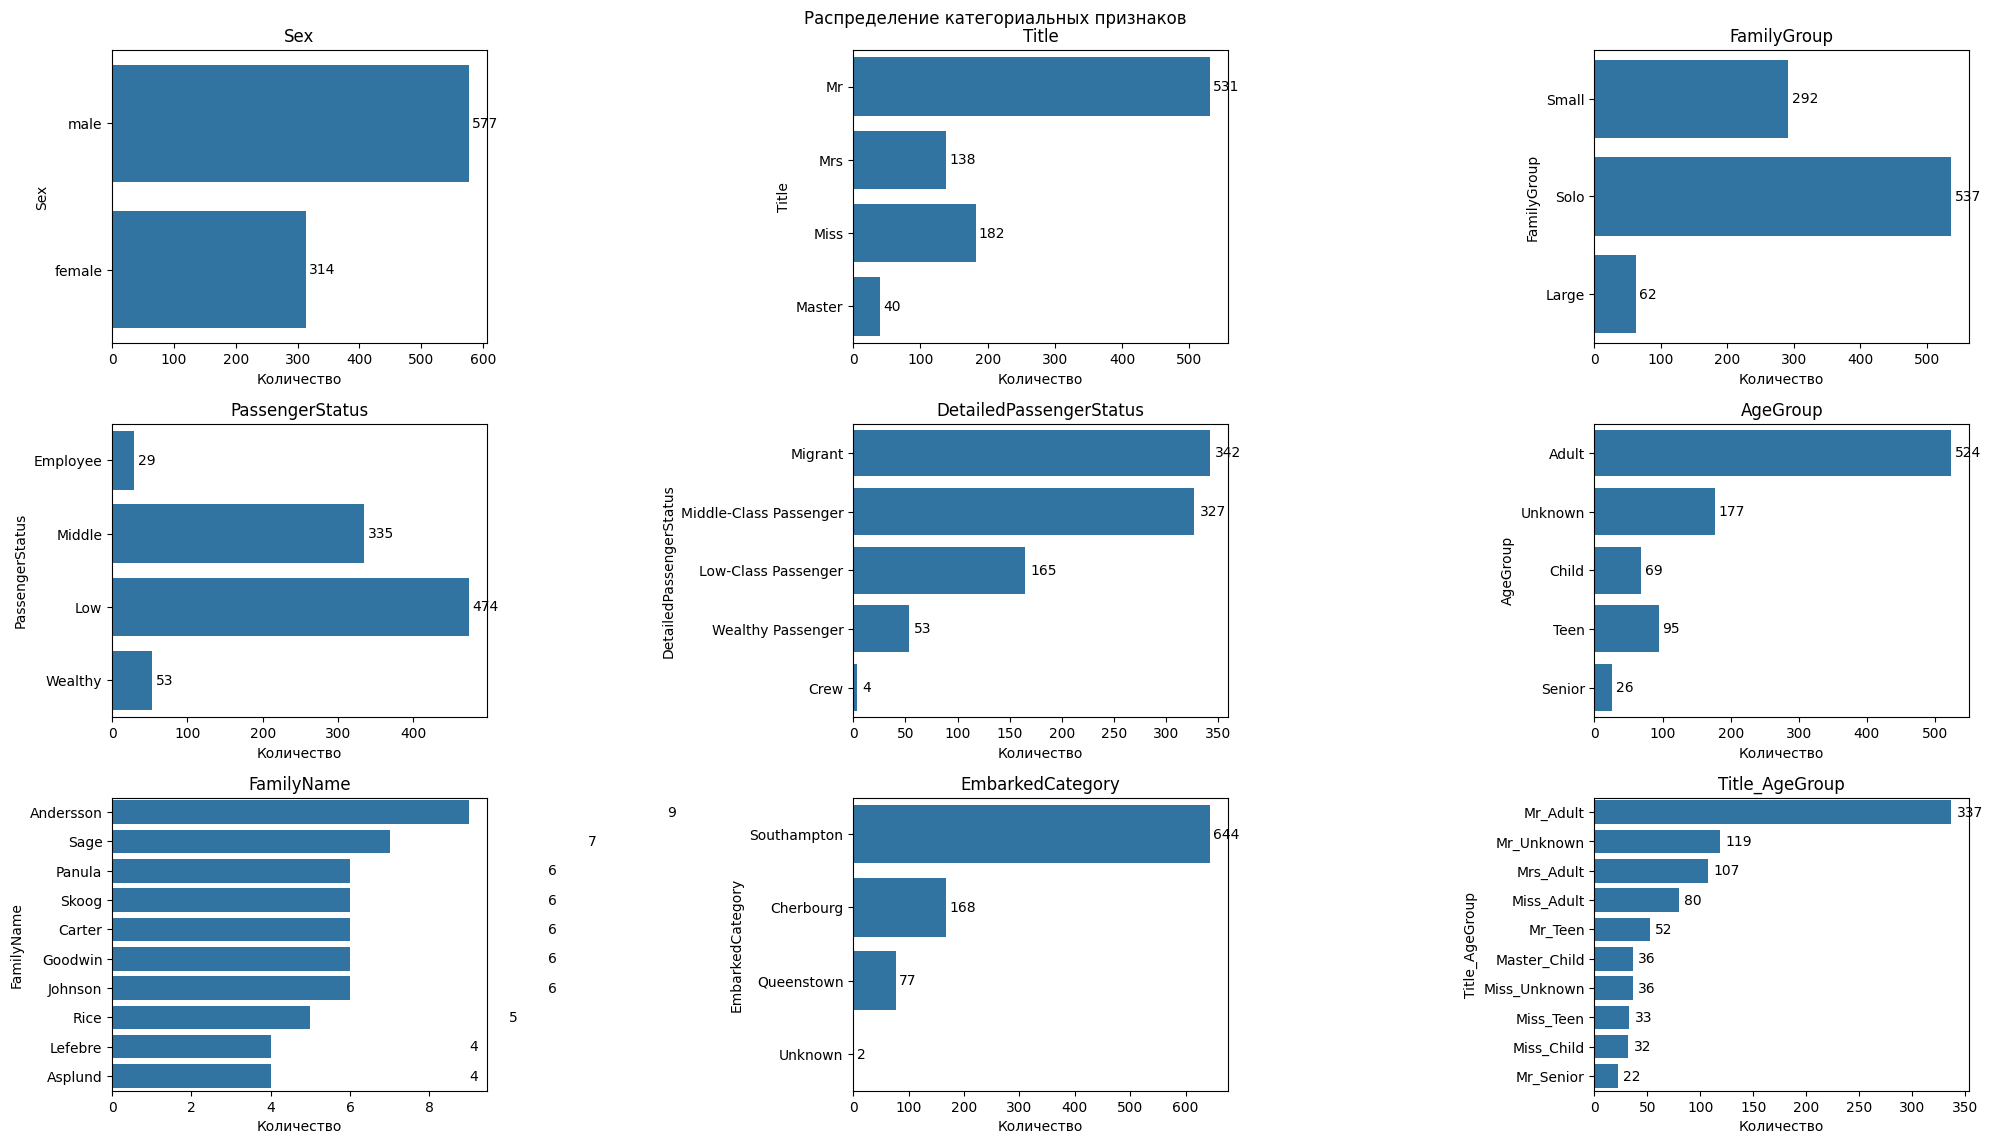

In [174]:
# 7. Визуализация категориальных признаков
categorical_in_features = [f for f in features if f in categorical_features]
plt.figure(figsize=(20, 15))
plt.suptitle('Распределение категориальных признаков')
for i, col in enumerate(categorical_in_features, 1):
    plt.subplot(len(categorical_in_features)//3 + 1, 3, i)
    
    if train[col].nunique() > 10:
        top_categories = train[col].value_counts().nlargest(10).index
        ax = sns.countplot(y=train[col], order=top_categories)
    else:
        ax = sns.countplot(y=train[col])
    
    plt.title(col)
    plt.xlabel('Количество')
    
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 5, p.get_y() + p.get_height()/2,
                f'{int(width)}',
                ha='left', va='center')

plt.tight_layout()
plt.show()

In [175]:
# 8. Модернизированный пайплайн предобработки
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [176]:
# 9. Определение моделей с интеграцией SMOTE
X = train[features]
y = train['Survived']

base_models = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

def create_enhanced_pipeline(classifier):
    return ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

models = {
    'XGBoost': create_enhanced_pipeline(
        XGBClassifier(
            n_estimators=200,
            max_depth=3, 
            learning_rate=0.1,
            subsamples=0.8,
            eval_metric='logloss', 
            use_label_encoder=False, 
            random_state=42)
    ),
    'RandomForest': create_enhanced_pipeline(
        RandomForestClassifier(
            n_estimators=1200,
            max_depth=9, 
            min_samples_split=8,
            max_leaf_nodes=72,
            class_weight='balanced_subsample', 
            random_state=42)
    ),
    'LGBM': create_enhanced_pipeline(
        LGBMClassifier(
            num_leaves=40,
            max_depth=6,
            learning_rate=0.06,
            n_estimators=500,
            reg_alpha=0.1, 
            force_col_wise=True,
            random_state=42,
            verbose=-1)
    ),
    'GradientBoosting': create_enhanced_pipeline(
        GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            random_state=42)
    ),
    'AdaBoost': create_enhanced_pipeline(
        AdaBoostClassifier(
            n_estimators=200,
            learning_rate=0.05,
            random_state=42)
    ),
    'LogisticRegression': create_enhanced_pipeline(
        LogisticRegression(
            max_iter=1000,
            class_weight='balanced',
            random_state=42)
    ),
    'SVC': create_enhanced_pipeline(
        SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            class_weight='balanced',
            probability=True,
            random_state=42)
    ),
    'Stacking': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', StackingClassifier(
            estimators=base_models,
            final_estimator=LogisticRegression(max_iter=1000, random_state=42),
            cv=5,
            n_jobs=-1)
        )
    ]),
    'CatBoost': ImbPipeline([
        ('preprocessor', ColumnTransformer([
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('transformer', PowerTransformer(method='yeo-johnson'))
            ]), numeric_features),
            ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)
        ])),
        ('smote', SMOTE(random_state=42)),
        ('classifier', CatBoostClassifier(
            iterations=2000, learning_rate=0.06, depth=8,
            cat_features=[features.index(col) for col in categorical_features if col in features],
            auto_class_weights='Balanced', eval_metric='Accuracy',
            early_stopping_rounds=100, verbose=0, random_seed=42
        ))
    ]),
    'BernoulliNB': create_enhanced_pipeline(BernoulliNB()),
    'KNeighbors': create_enhanced_pipeline(
        KNeighborsClassifier(n_neighbors=5, weights='distance')
    ),
    'LinearSVC': create_enhanced_pipeline(
        LinearSVC(
            C=1.0, 
            class_weight='balanced',
            max_iter=10000,
            random_state=42,
            dual=False)
    ),
    'RBF_SVM': create_enhanced_pipeline(
        SVC(
            kernel='rbf',
            C=1.0,
            gamma='auto',
            class_weight='balanced',
            probability=True,
            random_state=42)
    ),
    'GaussianProcess': create_enhanced_pipeline(
        GaussianProcessClassifier(
            kernel=1.0 * RBF(1.0),
            random_state=42)
    ),
    'DecisionTree': create_enhanced_pipeline(
        DecisionTreeClassifier(
            max_depth=5,
            min_samples_split=10,
            class_weight='balanced',
            random_state=42)
    ),
    'QDA': create_enhanced_pipeline(QuadraticDiscriminantAnalysis()),
    'NeuralNetwork': create_enhanced_pipeline(
        MLPClassifier(
            hidden_layer_sizes=(64, 32),
            activation='relu',
            solver='adam',
            alpha=0.0001,
            learning_rate='adaptive',
            max_iter=500,
            early_stopping=True,
            random_state=42)
    ),
    'SigmoidNN': create_enhanced_pipeline(
        MLPClassifier(
            hidden_layer_sizes=(32,),
            activation='logistic',
            solver='adam',
            alpha=0.001,
            learning_rate='constant',
            max_iter=1000,
            random_state=42)
    )
}

In [177]:
# 10. Функция для анализа важности признаков
def analyze_feature_importance(model, model_name, feature_names):
    plt.figure(figsize=(15, 10))
    
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=True)
        
        print("\nПолный рейтинг важности признаков (от наименее к наиболее важным):")
        print(importance_df.to_string())
        
        return importance_df
    
    elif hasattr(model, 'coef_'):
        coef = model.coef_[0]
        coef_df = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': coef
        }).sort_values('Coefficient', ascending=True)
        
        print("\nПолный рейтинг влияния признаков (от отрицательных к положительным):")
        print(coef_df.to_string())
        
        return coef_df
    
    else:
        print(f"\nДля модели {model_name} невозможно определить важность признаков")
        return None

In [178]:
# 11. Обучение и оценка моделей
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

print("\nОценка моделей:")
for name, model in models.items():
    try:
        print(f"\n=== Модель: {name} ===")
        
        if name == 'CatBoost':
            scores = cross_val_score(
                model, X, y,
                cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                scoring='accuracy',
                n_jobs=1
            )
        else:
            scores = cross_val_score(
                model, X, y,
                cv=cv,
                scoring='accuracy',
                n_jobs=-1
            )
        
        results[name] = (scores.mean(), scores.std())
        print(f"\nСредняя точность (кросс-валидация): {scores.mean():.4f} (±{scores.std():.4f})")
        
        model.fit(X, y)
        train_pred = model.predict(X)
        test_pred = model.predict(test[features])
        
        print("\nМетрики на обучающей выборке:")
        print(f"Accuracy: {accuracy_score(y, train_pred):.4f}")
        print("\nClassification Report:")
        print(classification_report(y, train_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y, train_pred))
        
        print("\n=== Анализ важности признаков ===")
        if name == 'CatBoost':
            feature_names = numeric_features + categorical_features
            model_for_analysis = model.named_steps['classifier'] if hasattr(model, 'named_steps') else model[-1]
        else:
            feature_names = preprocessor.get_feature_names_out()
            feature_names = [name.replace('cat__', '').replace('num__', '') for name in feature_names]
            model_for_analysis = model.steps[-1][1] if hasattr(model, 'steps') else model[-1]
        
        importance_df = analyze_feature_importance(model_for_analysis, name, feature_names)
        
        pd.DataFrame({
            'PassengerId': test['PassengerId'],
            'Survived': test_pred
        }).to_csv(f"predictions_{name}.csv", index=False)
        print(f"\nПредсказания сохранены в predictions_{name}.csv")
        
    except Exception as e:
        print(f"\nОшибка в модели {name}: {str(e)}")


Оценка моделей:

=== Модель: XGBoost ===

Средняя точность (кросс-валидация): 0.8316 (±0.0185)

Метрики на обучающей выборке:
Accuracy: 0.9125

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       549
           1       0.90      0.87      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891


Confusion Matrix:
[[516  33]
 [ 45 297]]

=== Анализ важности признаков ===

Полный рейтинг важности признаков (от наименее к наиболее важным):
                                            Feature  Importance
360                           FamilyName_Landergren    0.000000
470                              FamilyName_Nilsson    0.000000
471                                FamilyName_Nirva    0.000000
472                             FamilyName_Niskanen    0.000000
473                               Family

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [179]:
# 12. Сравнение результатов всех моделей
print("\n=== Итоговые результаты ===")
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Accuracy', 'Std'])
print(results_df.sort_values('Mean Accuracy', ascending=False))


=== Итоговые результаты ===
                    Mean Accuracy       Std
Stacking                 0.838391  0.017840
RandomForest             0.832779  0.012911
GradientBoosting         0.831649  0.015492
XGBoost                  0.831649  0.018466
GaussianProcess          0.830544  0.019428
LinearSVC                0.829396  0.008585
SVC                      0.824914  0.010921
AdaBoost                 0.823790  0.014941
DecisionTree             0.823778  0.021613
LogisticRegression       0.818185  0.008335
NeuralNetwork            0.818178  0.033649
LGBM                     0.813659  0.031021
RBF_SVM                  0.803584  0.012413
SigmoidNN                0.801331  0.025881
BernoulliNB              0.763210  0.028964
KNeighbors               0.757624  0.030402
QDA                      0.545459  0.011582
